<a href="https://colab.research.google.com/github/abrehamgezahegn/ml-notebooks/blob/master/Simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


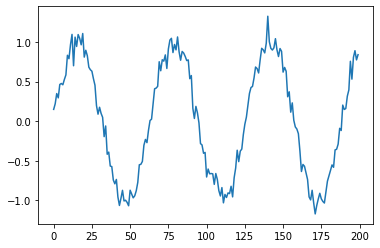

In [91]:
# series = np.sin(np.arange(200) * 0.1 ) + np.random.rand(200)*0.1

series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)


In [92]:
T = 10
X = []
Y = []
series_len = series.size - T


for t in range(series_len):
  x = series[t: T+t]
  y =series[T+t] 
  X.append(x)
  Y.append(y)

# this is a slow way of doing it
# while len >= 0: 
#   x = series[i:T+1]
  # y =series[T+t] 
#   X.append(x)
  # Y.append(y)
#   i+=i
#   T+=T
#   len-=len

# reshape and convert to arrar
X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)

In [5]:
len(X)

190

In [93]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import  Model
from tensorflow.keras.optimizers import  Adam

In [94]:
i = Input(shape=(T, 1))
x = SimpleRNN(15, activation=None)(i)
x = Dense(1)(x)

model = Model(i,x)



In [95]:
model.compile(loss="mse", optimizer=Adam(learning_rate=1e-3))
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 15)                255       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [96]:
N = len(X)
X_train = X[0: N // 2 ]
X_test =   X[N // 2:]
y_train = Y[0: N // 2]
y_test = Y[N//2:]

r = model.fit(X_train , y_train , validation_data=(X_test , y_test) , epochs=100)

# r = model.fit(
#   X[:-N//2], Y[:-N//2],
#   epochs=80,
#   validation_data=(X[-N//2:], Y[-N//2:]),
# )

Epoch 1/100
3/3 [==============================] - 1s 137ms/step - loss: 0.2285 - val_loss: 0.0901
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0891 - val_loss: 0.0892
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0968 - val_loss: 0.0748
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0715 - val_loss: 0.0487
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0510 - val_loss: 0.0365
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0390 - val_loss: 0.0327
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0450 - val_loss: 0.0273
Epoch 8/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0386 - val_loss: 0.0223
Epoch 9/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0241 - val_loss: 0.0205
Epoch 10/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0222 - val_loss: 0.0206
Epoch 11/100
3/3 [

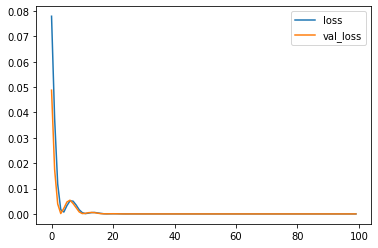

In [87]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

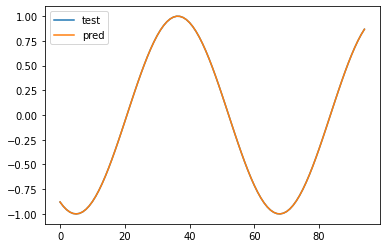

In [88]:
pred = model.predict(X_test)
pred

plt.plot(y_test, label="test")
plt.plot( pred , label="pred")
plt.legend()

In [53]:
predictions = []

for i in range( len(X_test)):
  p = model.predict(X_test[i].reshape(1,-1,1))[0,0]
  predictions.append(p)


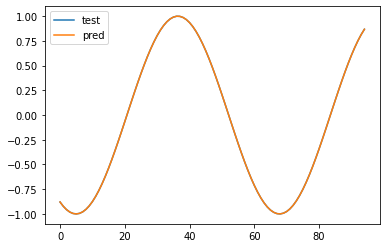

In [54]:
len(predictions)
plt.plot(y_test, label="test")
plt.plot(predictions , label="pred")
plt.legend()

In [97]:
predictions2 = []
X_test_real = X_test[0]
for i in range(len(X_test)-1):
   p = model.predict(X_test_real.reshape(1,-1,1))[0,0]
   predictions2.append(p)
   X_test_real = np.roll(X_test_real , -1)
   X_test_real[-1] = p




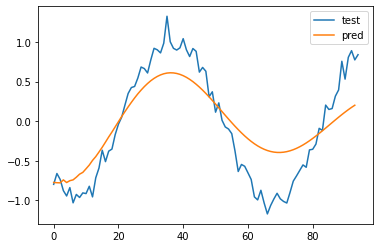

In [98]:
plt.plot(y_test, label="test")
plt.plot(predictions2 , label="pred")
plt.legend()